## Implement K-means clustering using a small dataset (2D data / 10-12 objects)

### Initilaize centroids by:

1. Randomly generate k centroids within range of attributes

2. Randomly choose k data objects to be centroids

In [1]:
'''
define data points
 
column 1: x values
column 2: y values
column 3: cluster assigned (initial value -1)
'''

import numpy as np

data = np.array([
    [10, 9, -1],
    [12, 18, -1],
    [15, 29, -1],
    [22, 18, -1],
    [49, 33, -1],
    [51, 40, -1],
    [47, 39, -1],
    [53, 50, -1],
    [62, 45, -1],
    [93, 99, -1],
    [95, 89, -1],
    [99, 93, -1]
])

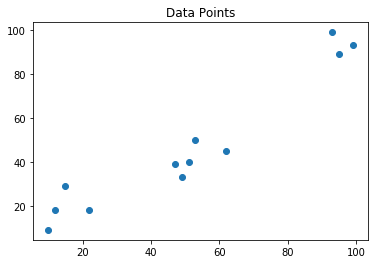

In [2]:
# visualize data

from matplotlib import pyplot as plt

plt.scatter(data[:,0], data[:,1])
plt.title('Data Points')
plt.show()

In [10]:
# Centroid Initialization Using Range

import random

def random_values_within_range(x, y, k):
    x_min = min(x)
    x_max = max(x)
    centroids_x = random.sample(range(x_min, x_max), k)
    
    y_min = min(y)
    y_max = max(y)
    centroids_y = random.sample(range(y_min, y_max), k)
    
    return np.column_stack((centroids_x, centroids_y))   

In [11]:
# euclidean distance

def calculate_dist(p1, p2):
    return (p1[0]-p2[0])**2 + (p1[1]-p2[1])**2    

In [12]:
# function to update clusters assigned to data points

def update_clusters(data, centroids, k):
    #print(centroids)
    for p in data:
        min_dist = 9999
        for c in range(len(centroids)):
            temp = calculate_dist(centroids[c], p)
            if temp < min_dist:
                min_dist = temp
                p[2] = c

In [13]:
# function to update cluster centroids

def update_centroids(data, centroids, k):
    for c in range(len(centroids)):
        x_sse = 0
        y_sse = 0
        m = 0
        for p in data:
            if p[2] == c:
                x_sse += p[0]
                y_sse += p[1]
                m += 1
        if m > 0:
            centroids[c, 0] = x_sse/m
            centroids[c, 1] = y_sse/m        

In [14]:
def kmeans_using_range(data, k, iterations):
    plt.scatter(data[:,0], data[:,1], color='blue', label='Data Points')
    
    centroids = random_values_within_range(data[:,0], data[:,1], k)
    plt.scatter(centroids[:,0], centroids[:,1], color = 'red', label='Initial Centroids')
    
    for i in range(iterations):
        update_clusters(data, centroids, k)
        update_centroids(data, centroids, k)
    
    plt.scatter(centroids[:,0], centroids[:,1], color = 'black', label='Final Centroids')
    plt.title('K-means clustering using Range')
    plt.legend()

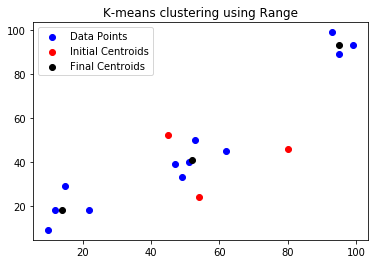

In [15]:
kmeans_using_range(data, 3, 5)

In [16]:
# Centroid Initialization using random points in data

def random_points_in_data(data, k):
    temp = list(data)
    centroids = random.sample(temp, k)
    centroids = np.array(centroids)
    centroids = np.delete(centroids, 2, 1)
    return centroids  

In [19]:
def kmeans_using_random_data_points(data, k, iterations):
    plt.scatter(data[:,0], data[:,1], color='blue', label='Data Points')
    
    centroids = random_points_in_data(data, k)
    plt.scatter(centroids[:,0], centroids[:,1], color = 'red', label='Initial Centroids')
    
    for i in range(iterations):
        update_clusters(data, centroids, k)
        update_centroids(data, centroids, k)
    
    plt.scatter(centroids[:,0], centroids[:,1], color = 'black', label='Final Centroids')
    plt.title('K-means clustering using random data points')
    plt.legend()

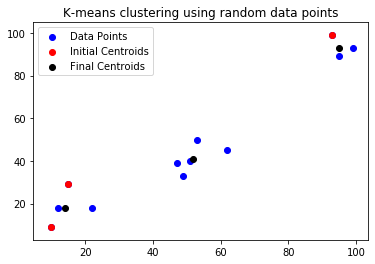

In [24]:
kmeans_using_random_data_points(data, 3, 5)